In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

from PIL import Image
from tensorflow import keras
import tensorflow.keras.layers as k

# DATA

In [16]:
from keras.preprocessing.image import  load_img

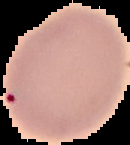

In [17]:
load_img(r'C:\Users\DINESH SHARMA\Desktop\GIT hub project uploading\cell_images\Parasitized/C33P1thinF_IMG_20150619_120645a_cell_215.png')

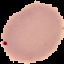

In [18]:
load_img(r'C:\Users\DINESH SHARMA\Desktop\GIT hub project uploading\cell_images\Parasitized/C33P1thinF_IMG_20150619_120645a_cell_215.png',target_size=(64,64))

In [19]:
os.environ['KERAS_BACKEND']='tensorflow'
np.random.seed(312)

In [20]:
img_dir=r"C:\Users\DINESH SHARMA\Desktop\GIT hub project uploading\cell_images"
size=64
dataset=[]
label=[]

In [46]:
parasitized_img=os.listdir(img_dir+'\Parasitized')
parasitized_img=parasitized_img[:6000]
for i , img_name in enumerate(tqdm(parasitized_img)):
    if(img_name.split('.')[1]=='png'):
        image=cv2.imread(img_dir+'\parasitized'+'\\'+img_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(0)
        

100%|██████████████████████████████████████████████████████████████████████████████| 6000/6000 [02:17<00:00, 43.60it/s]


In [47]:
len(parasitized_img)

6000

In [48]:
parasitized_img[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [49]:
Uninfected_img=os.listdir(img_dir+r'\Uninfected')
Uninfected_img=Uninfected_img[:6000]
for i , img_name in enumerate(tqdm(Uninfected_img)):
    if '.' in img_name:
        if(img_name.split('.')[1]=='png'):
            image=cv2.imread(img_dir+r'\Uninfected'+r'\\'+img_name)
            image=Image.fromarray(image,'RGB')
            image=image.resize((size,size))

            dataset.append(np.array(image))
            label.append(1)

100%|██████████████████████████████████████████████████████████████████████████████| 6000/6000 [01:56<00:00, 51.29it/s]


In [50]:
len(Uninfected_img)

6000

In [51]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
xtrain, xtest, ytrain, ytest=train_test_split(dataset, to_categorical(np.array(label)), test_size=0.2, random_state=0)

# CNN Model Architecture

In [52]:
INPUT_SHAPE=(size,size,3)

inp=k.Input(shape=INPUT_SHAPE)

conv1=k.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1=k.MaxPool2D(pool_size=(2,2))(conv1)
norm1=k.BatchNormalization(axis=-1)(pool1)
drop1=k.Dropout(rate=0.2)(norm1)

conv2=k.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2=k.MaxPool2D(pool_size=(2,2))(conv2)
norm2=k.BatchNormalization(axis=-1)(pool2)
drop2=k.Dropout(rate=0.2)(norm2)

flat=k.Flatten()(drop2)

hidden1=k.Dense(512, activation='relu')(flat)
norm3=k.BatchNormalization(axis=-1)(hidden1)
drop3=k.Dropout(rate=0.2)(norm3)

hidden2=k.Dense(256, activation='relu')(drop3)
norm4=k.BatchNormalization(axis=-1)(hidden2)
drop4=k.Dropout(rate=0.2)(norm4)

out=k.Dense(2, activation='sigmoid')(drop4)

In [36]:
model=keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,340,130 (16.56 MB)

 Trainable params: 4,338,466 (16.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

None


In [53]:
history=model.fit(np.array(xtrain), ytrain, batch_size=64, verbose=1, epochs=20,
                 validation_split=0.1, shuffle=False)

Epoch 1/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 61s 290ms/step - accuracy: 0.9092 - loss: 0.2801 - val_accuracy: 0.7403 - val_loss: 0.4599
Epoch 2/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 80s 291ms/step - accuracy: 0.9472 - loss: 0.1315 - val_accuracy: 0.9597 - val_loss: 0.1225
Epoch 3/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 57s 281ms/step - accuracy: 0.9691 - loss: 0.0865 - val_accuracy: 0.9583 - val_loss: 0.1147
Epoch 4/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 55s 270ms/step - accuracy: 0.9764 - loss: 0.0661 - val_accuracy: 0.9597 - val_loss: 0.1251
Epoch 5/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 59s 289ms/step - accuracy: 0.9842 - loss: 0.0493 - val_accuracy: 0.9403 - val_loss: 0.2454
Epoch 6/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 60s 296ms/step - accuracy: 0.9837 - loss: 0.0460 - val_accuracy: 0.9646 - val_loss: 0.0988
Epoch 7/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 59s 292ms/step - accuracy: 0.9850 - loss: 0.0401 - val_accuracy: 0.9521 - val_loss: 0.1946
Epoch 8/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 60s 296ms/step - accuracy: 0.9884 - loss: 0

# Accuracy with 5 epochs

In [41]:
print('Test_Accuracy: {:.2f}%'.format(model.evaluate(np.array(xtest), np.array(ytest))[1]*100))

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6027 - loss: 5.6883
Test_Accuracy: 59.75%


# Accuracy with 20 epochs

In [54]:
print('Test_Accuracy: {:.2f}%'.format(model.evaluate(np.array(xtest), np.array(ytest))[1]*100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9633 - loss: 0.2266
Test_Accuracy: 96.22%


# Graphs with 5 epochs accuracy

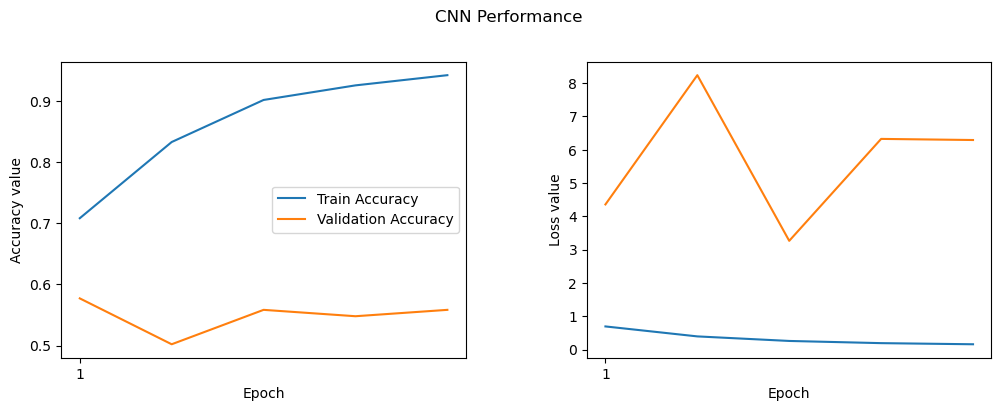

In [42]:
f, (ax1,ax2)=plt.subplots(1,2, figsize=(12,4))
t=f.suptitle('CNN Performance ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch=len(history.history['accuracy'])+1
epoch_list=list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'],label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy value')
ax1.set_xlabel('Epoch')
ax1.set_label('Accuracy')
l1=ax1.legend(loc='best')

ax2.plot(epoch_list, history.history['loss'],label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'],label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss value')
ax2.set_xlabel('Epoch')
ax2.set_label('Loss')
l2=ax1.legend(loc='best')



# Graphs With 20 epochs Accuracy

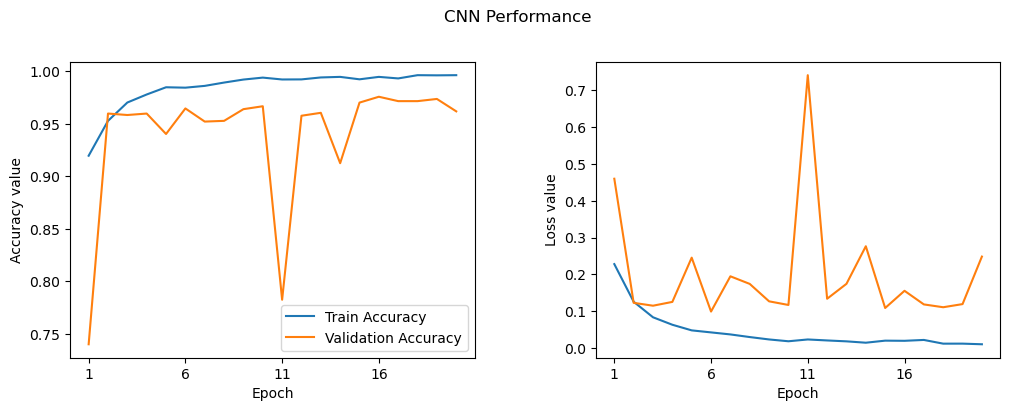

In [55]:
f, (ax1,ax2)=plt.subplots(1,2, figsize=(12,4))
t=f.suptitle('CNN Performance ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch=len(history.history['accuracy'])+1
epoch_list=list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'],label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy value')
ax1.set_xlabel('Epoch')
ax1.set_label('Accuracy')
l1=ax1.legend(loc='best')

ax2.plot(epoch_list, history.history['loss'],label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'],label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss value')
ax2.set_xlabel('Epoch')
ax2.set_label('Loss')
l2=ax1.legend(loc='best')
